In [50]:
# import sys 
# sys.path.append('../assgn1/myenv/myenv/env')

# from random_walk import randomWalk
# from ten_arm_bandit import tenArmBandit
# from two_arm_bandit import twoArmBandit

In [51]:
import gym
import numpy as np
from numpy import random
from numpy.core.fromnumeric import argmax
from math import exp,log,sqrt
import matplotlib.pyplot as plt 

# Problem 1, Q1.

Tests the environment created for different values of alpha and Beta

In [52]:
print("Testing the Two Arm Bandit Enviroment")  

print("Environment always favour the decision.")
prob = [1,1]
bandit2arm = gym.make('myenv:TwoArmBandit-v0', prob = prob)
seed = 50
for i in range(10):
    random.seed(seed)
    action = random.binomial(1,0.5)
    fin_state,bin_action,reward = bandit2arm.step(action)
    print("Current state: 1 | Action Taken: ",action,"| Environment Response: "
          ,bin_action,"| Final State: ",fin_state,"| Reward: ",reward)
    bandit2arm.reset()
    seed+=5
    
print("\nEnvironment always oppose the decision.")
prob = [0,0]
seed = 80
bandit2arm = gym.make('myenv:TwoArmBandit-v0', prob = prob)

for i in range(10):
    random.seed(seed)
    action = random.binomial(1,0.5)
    fin_state,bin_action,reward = bandit2arm.step(action)
    print("Current state: 1 | Action Taken: ",action,"| Environment Response: "
          ,bin_action,"| Final State: ",fin_state,"| Reward: ",reward)
    bandit2arm.reset()
    seed += 5
    
print("\nEnvironment favours the left decision and opposes the right decision.")
prob = [1,0]
bandit2arm = gym.make('myenv:TwoArmBandit-v0', prob = prob)

seed = 80
for i in range(10):
    random.seed(seed)
    action = random.binomial(1,0.5)
    fin_state,bin_action,reward = bandit2arm.step(action)
    print("Current state: 1 | Action Taken: ",action,"| Environment Response: "
          ,bin_action,"| Final State: ",fin_state,"| Reward: ",reward)
    bandit2arm.reset()
    seed+=1
    
print("\nEnvironment opposes the left decision and favours the right decision.")
prob = [0,1]
bandit2arm = gym.make('myenv:TwoArmBandit-v0', prob = prob)

seed = 50
for i in range(10):
    random.seed(seed)
    seed+=5
    action = random.binomial(1,0.5)
    fin_state,bin_action,reward = bandit2arm.step(action)
    print("Current state: 1 | Action Taken: ",action,"| Environment Response: "
          ,bin_action,"| Final State: ",fin_state,"| Reward: ",reward)
    bandit2arm.reset()
    
print("\nEnvironment favours the left decision with 0.8 probability.")
prob = [0.8,0]
bandit2arm = gym.make('myenv:TwoArmBandit-v0', prob = prob)

total_value = 0
seed = 80
for i in range(1000):
    random.seed(seed)
    seed+=1
    fin_state,bin_action,reward = bandit2arm.step(0)
    total_value = total_value+reward
    bandit2arm.reset()
print("Number of times the environment favours the agent's action: ", total_value)

print("\nEnvironment favours the right decision with 0.8 probability.")
prob = [0,0.8]
bandit2arm = gym.make('myenv:TwoArmBandit-v0', prob = prob)

total_value = 0
seed = 90
for i in range(1000):
    random.seed(seed)
    seed+=1
    fin_state,bin_action,reward = bandit2arm.step(1)
    total_value = total_value+reward
    bandit2arm.reset()
print("Number of times the environment favours the agent's action: ", total_value)
    
print("\nRandom and symmetric environment.")
prob = [0.5,0.5]
bandit2arm = gym.make('myenv:TwoArmBandit-v0', prob = prob)

total_value = 0
seed = 50
for i in range(1000):
    random.seed(seed)
    seed+=50
    action = random.binomial(1,0.5)
    fin_state,bin_action,reward = bandit2arm.step(action)
    total_value = total_value+reward
    bandit2arm.reset()
print("Number of times the environment favours the agent's action: ", total_value)

Testing the Two Arm Bandit Enviroment
Environment always favour the decision.
Current state: 1 | Action Taken:  0 | Environment Response:  0 | Final State:  0 | Reward:  1
Current state: 1 | Action Taken:  0 | Environment Response:  0 | Final State:  0 | Reward:  1
Current state: 1 | Action Taken:  0 | Environment Response:  0 | Final State:  0 | Reward:  1
Current state: 1 | Action Taken:  0 | Environment Response:  0 | Final State:  0 | Reward:  1
Current state: 1 | Action Taken:  1 | Environment Response:  1 | Final State:  2 | Reward:  1
Current state: 1 | Action Taken:  1 | Environment Response:  1 | Final State:  2 | Reward:  1
Current state: 1 | Action Taken:  1 | Environment Response:  1 | Final State:  2 | Reward:  1
Current state: 1 | Action Taken:  1 | Environment Response:  1 | Final State:  2 | Reward:  1
Current state: 1 | Action Taken:  0 | Environment Response:  0 | Final State:  0 | Reward:  1
Current state: 1 | Action Taken:  0 | Environment Response:  0 | Final State

# Problem 1, Q2.

Testing the 10 armp bandit gaussian environment

In [53]:
print("Testing the 10 Arm Bandit Environment:")
random.seed(10)
q = random.normal(loc = 0,scale = 1,size = 10)
print("The Q* values with mean at 0 and variance 1:\n",q)
bandit10arm = gym.make('TenArmBandit-v0', gauss = q)

for i in range(10):
    action = random.randint(0,10)
    final_state,action, reward = bandit10arm.step(action)
    print("Current state: 1 | Action Taken: ",(action),"| Final State: ",final_state,"| Reward: ",reward)

random.seed(10)
q2 = random.normal(loc = 0,scale = 10,size = 10)
print("\nThe Q* values with mean at 0 and variance 10:\n",q2)
bandit10arm = gym.make('TenArmBandit-v0', gauss = q2)

for i in range(10):
    action = random.randint(0,10)
    final_state,action, reward = bandit10arm.step(action)
    print("Current state: 1 | Action Taken: ",(action),"| Final State: ",final_state,"| Reward: ",reward)

Testing the 10 Arm Bandit Environment:
The Q* values with mean at 0 and variance 1:
 [ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021]
Current state: 1 | Action Taken:  1 | Final State:  2 | Reward:  -0.2497866961183578
Current state: 1 | Action Taken:  3 | Final State:  4 | Reward:  1.0198902280541817
Current state: 1 | Action Taken:  6 | Final State:  7 | Reward:  0.6191695244897267
Current state: 1 | Action Taken:  9 | Final State:  10 | Reward:  1.6091007307918814
Current state: 1 | Action Taken:  6 | Final State:  7 | Reward:  0.7055036012539037
Current state: 1 | Action Taken:  1 | Final State:  2 | Reward:  0.2870445796058391
Current state: 1 | Action Taken:  9 | Final State:  10 | Reward:  2.0057280958869828
Current state: 1 | Action Taken:  6 | Final State:  7 | Reward:  0.4559784665927921
Current state: 1 | Action Taken:  7 | Final State:  8 | Reward:  0.7874797205419873
Current state: 1 | Action Taken: 

# Problem 1, Q3

## Pure Exploitation

In [54]:
def pureExploitation(env,maxEpisodes):
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    Q_est = np.zeros((maxEpisodes+1,env.action_space.n))
    A = np.zeros(maxEpisodes,dtype = int)
    r = []
    r.append(0)
    while e<maxEpisodes:
        a = np.argmax(Q)
        # if Q[a]==0:
        #     a = np.random.randint(0,len(Q))
        pos = []
        for i in range(len(Q)):
            if(Q[i]==Q[a]):
                pos.append(i)
        a = random.choice(pos)
        # print(type(a))
        A[e] = a
        next, bin_action, R = env.step(a)
        r.append(R)
        N[a] = N[a]+1
        Q[a] = Q[a]+(R-Q[a])/N[a]
        e = e+1
        Q_est[e] = Q
    r = np.array(r)
    env.reset()
    return Q_est,r,A

## Pure Exploration

In [55]:
def pureExploration(env,maxEpisodes):
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    A = np.zeros(maxEpisodes,dtype = int)
    Q_est = np.zeros((maxEpisodes+1,env.action_space.n))
    r = []
    r.append(0)
    while e<maxEpisodes:
        a = random.randint(0,len(Q))
        # print(type(a))
        next, bin_action, R = env.step(a)
        r.append(R)
        N[a] = N[a]+1
        A[e] = a
        Q[a] = Q[a]+(R-Q[a])/N[a]
        e = e+1
        Q_est[e] = Q
    r = np.array(r)
    env.reset()
    return Q_est,r,A

## Greedy Epsilon

In [56]:
def epsilonGreedy(env,maxEpisodes,E):
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    Q_est = np.zeros((maxEpisodes+1,env.action_space.n))
    A = np.zeros(maxEpisodes,dtype = int)
    r = []
    r.append(0)
    while e<maxEpisodes:
        if(random.rand()>E):
            a = argmax(Q)
            pos = []
            for i in range(len(Q)):
                if(Q[i]==Q[a]):
                    pos.append(i)
            a = random.choice(pos)
        else:
            a = random.randint(0,len(Q))
        # print(type(a))
        next, bin_action, R = env.step(a)
        r.append(R)
        N[a] = N[a]+1
        Q[a] = Q[a]+(R-Q[a])/N[a]
        A[e] = a
        e = e+1
        Q_est[e] = Q
    r = np.array(r)
    env.reset()
    return Q_est,r,A

## Decay Epsilon Greedy

In [57]:
def decayEpsilonGreedy(env,maxEpisodes,E,decay_type,decay_rate):
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    A = np.zeros(maxEpisodes,dtype = int)
    Q_est = np.zeros((maxEpisodes+1,env.action_space.n))
    r = []
    # print(E,type(E))
    # print(random.rand(), type(random.rand()))
    r.append(0)
    while e<maxEpisodes:
        if random.rand() > E :
            a = argmax(Q)
            if Q[a]==0:
                a = random.randint(0,len(Q))
        else:
            a = random.randint(0,len(Q))
        # print(type(a))
        next, bin_action, R = env.step(a)
        r.append(R)
        N[a] = N[a]+1
        Q[a] = Q[a]+(R-Q[a])/N[a]
        A[e] = a
        e = e+1
        Q_est[e] = Q
        E = decayEpsilon(E,decay_type,decay_rate)
    r = np.array(r)
    env.reset()
    return Q_est,r,A
        
def decayEpsilon(initialValue, decayTypes,decay_rate):
    finalValue = 0.01
    if decayTypes=="linear":
        return(initialValue-decay_rate)
    else:
        return initialValue*exp(-decay_rate)

## Softmax function

In [58]:
def softmax(env,maxEpisodes,tau,decayTypes,decayRate):
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    Q_est = np.zeros((maxEpisodes+1,env.action_space.n))
    A = np.zeros(maxEpisodes,dtype = int)
    r = []
    r.append(0)
    while e<maxEpisodes:
        probs = Softmax(Q/tau)
        a = random.choice(np.arange(env.action_space.n),p = probs)
        # print(a)
        next,bin_action,R = env.step(a)
        r.append(R)
        N[a] += 1
        Q[a] = Q[a] + (R-Q[a])/N[a]
        tau = decayTau(tau,decayTypes,decayRate)
        A[e] = a
        e+=1
        Q_est[e] = Q
    r = np.array(r)
    env.reset()
    return Q_est,r,A

def Softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

def decayTau(initialValue,decayTypes,decay_rate):
    if decayTypes=="linear":
        return(initialValue-decay_rate)
    else:
        return initialValue*exp(-decay_rate)

## UCB function

In [59]:
def UCB(env,maxEpisodes,c):
    Q = np.zeros(env.action_space.n)
    N = np.zeros(env.action_space.n)
    e = 0
    Q_est = np.zeros((maxEpisodes+1,env.action_space.n))
    A = np.zeros(maxEpisodes,dtype = int)
    r = []
    r.append(0)
    while e<maxEpisodes:
        if e<len(Q):
            a = e
        else:
            U = c*sqrt(log(e))/np.sqrt(N)
            a = argmax(Q+U)
        state,action,R = env.step(a)
        r.append(R)
        N[a] += 1
        Q[a] = Q[a]+(R-Q[a])/N[a]
        A[e] = a
        e+=1
        Q_est[e] = Q
    r = np.array(r)
    env.reset()
    return Q_est,r,A

testing the agents with probability = [0.8,0.8],[0.8,0.2],[0.2,0.8]

In [61]:
print("testing the agents with probability = [0.8,0.8]")
bandit2arm = gym.make('myenv:TwoArmBandit-v0',prob = [0.8,0.8])
q1,r1,a1 = pureExploitation(bandit2arm,10)
q2,r2,a2 = pureExploration(bandit2arm,10)
q3,r3,a3 = epsilonGreedy(bandit2arm,10,0.2)
q4,r4,a4 = decayEpsilonGreedy(bandit2arm,10,1,"exponential",0.01)
q5,r5,a5 = softmax(bandit2arm,10,100000,"linear",99.99999)
q6,r6,a6 = UCB(bandit2arm,10,0.2)
print("Pure Exploitation")
print(q1)
print("Pure Exploration")
print(q2)
print("Epsilon Greedy")
print(q3)
print("decay-Epsilon Greedy")
print(q4)
print("Softmax")
print(q5)
print("UCB")
print(q6)

print("testing the agents with probability = [0.8,0.2]")
bandit2arm = gym.make('myenv:TwoArmBandit-v0',prob = [0.8,0.2])
q1,r1,a1 = pureExploitation(bandit2arm,10)
q2,r2,a2 = pureExploration(bandit2arm,10)
q3,r3,a3 = epsilonGreedy(bandit2arm,10,0.4)
q4,r4,a4 = decayEpsilonGreedy(bandit2arm,10,1,"exponential",0.01)
q5,r5,a5 = softmax(bandit2arm,10,10,"linear",0.009999999)
q6,r6,a6 = UCB(bandit2arm,10,0.3)
print("Pure Exploitation")
print(q1)
print("Pure Exploration")
print(q2)
print("Epsilon Greedy")
print(q3)
print("decay-Epsilon Greedy")
print(q4)
print("Softmax")
print(q5)
print("UCB")
print(q6)

print("testing the agents with probability = [0.2,0.8]")
bandit2arm = gym.make('myenv:TwoArmBandit-v0',prob = [0.2,0.8])
q1,r1,a1 = pureExploitation(bandit2arm,10)
q2,r2,a2 = pureExploration(bandit2arm,10)
q3,r3,a3 = epsilonGreedy(bandit2arm,10,0.6)
q4,r4,a4 = decayEpsilonGreedy(bandit2arm,10,1,"exponential",0.01)
q5,r5,a5 = softmax(bandit2arm,10,100,"linear",0.09999999)
q6,r6,a6 = UCB(bandit2arm,10,0.6)
print("Pure Exploitation")
print(q1)
print("Pure Exploration")
print(q2)
print("Epsilon Greedy")
print(q3)
print("decay-Epsilon Greedy")
print(q4)
print("Softmax")
print(q5)
print("UCB")
print(q6)





testing the agents with probability = [0.8,0.8]
Pure Exploitation
[[0.         0.        ]
 [0.         0.        ]
 [0.5        0.        ]
 [0.33333333 0.        ]
 [0.5        0.        ]
 [0.4        0.        ]
 [0.5        0.        ]
 [0.42857143 0.        ]
 [0.5        0.        ]
 [0.55555556 0.        ]
 [0.6        0.        ]]
Pure Exploration
[[0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Epsilon Greedy
[[0.         0.        ]
 [1.         0.        ]
 [0.5        0.        ]
 [0.66666667 0.        ]
 [0.75       0.        ]
 [0.8        0.        ]
 [0.8        1.        ]
 [0.8        1.        ]
 [0.8        0.66666667]
 [0.83333333 0.66666667]
 [0.85714286 0.66666667]]
decay-Epsilon Greedy
[[0.         0.        ]
 [0.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.5       ]
 [1.         0.66666667]
 [1.         0.66666667]
 [1.         0.5       ]
 [1.         0.5       ]
 [1.

Pre-computing the values for subsequent questions

In [62]:
# np.random.seed(3)
# prob = random.uniform(0,1,(50,2))
# print(prob)
exploit = []
explore = []
epsilon = []
depsilon = []
soft_max = []
ucb = []

regret_exploit = np.zeros(1000)
regret_explore = np.zeros(1000)
regret_epsilon = np.zeros(1000)
regret_depsilon = np.zeros(1000)
regret_soft_max = np.zeros(1000)
regret_ucb = np.zeros(1000)

opt_exploit = np.zeros(1000)
opt_explore = np.zeros(1000)
opt_epsilon = np.zeros(1000)
opt_depsilon = np.zeros(1000)
opt_soft_max = np.zeros(1000)
opt_ucb = np.zeros(1000)

seed = np.arange(50,100)
for i in range(50):
    np.random.seed(seed[i])
    prob = random.uniform(0,1,2)
    bandit2arm = gym.make('myenv:TwoArmBandit-v0',prob = prob)
    
    vstar = np.amax(prob)
    optimal_action = np.argmax(prob)
    
    q1,r1,a1 = pureExploitation(bandit2arm,1000)
    q2,r2,a2 = pureExploration(bandit2arm,1000)
    q3,r3,a3 = epsilonGreedy(bandit2arm,1000,0.4)
    q4,r4,a4 = decayEpsilonGreedy(bandit2arm,1000,1,"exponential",0.01)
    q5,r5,a5 = softmax(bandit2arm,1000,100,"linear",0.09999999)
    q6,r6,a6 = UCB(bandit2arm,1000,1)
    
    exploit.append(r1)
    explore.append(r2)
    epsilon.append(r3)
    depsilon.append(r4)
    soft_max.append(r5)
    ucb.append(r6)
    
    for j in range(1000):
        if a1[j]==optimal_action:
            opt_exploit[j]+=1
        if a2[j]==optimal_action:
            opt_explore[j]+=1
        if a3[j]==optimal_action:
            opt_epsilon[j]+=1
        if a4[j]==optimal_action:
            opt_depsilon[j]+=1
        if a5[j]==optimal_action:
            opt_soft_max[j]+=1
        if a6[j]==optimal_action:
            opt_ucb[j]+=1
        
    for j in range(1000):
        regret_exploit[j] += vstar - prob[a1[j]]
        regret_explore[j] += vstar - prob[a2[j]]
        regret_epsilon[j] += vstar - prob[a3[j]]
        regret_depsilon[j] += vstar - prob[a4[j]]
        regret_soft_max[j] += vstar - prob[a5[j]]
        regret_ucb[j] += vstar - prob[a6[j]]
        
    

# Problem 1, Q4

Plots of average reward for each agent, for 50 environments and 1000 episodes

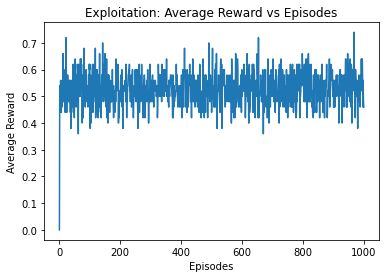

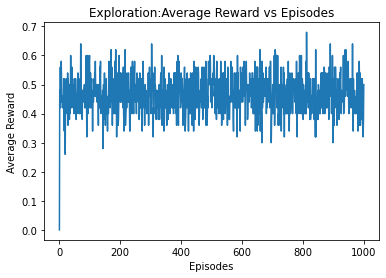

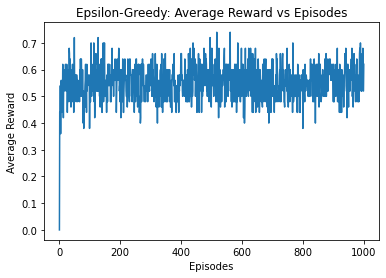

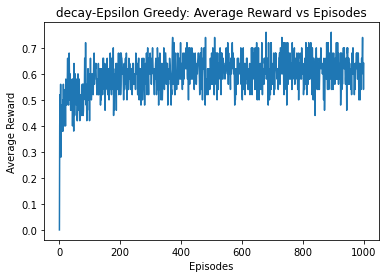

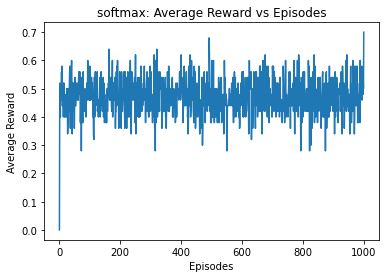

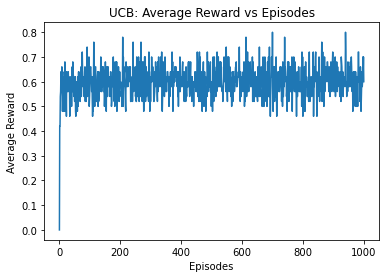

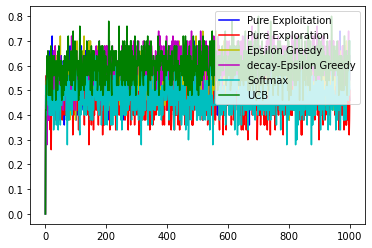

In [63]:
exploit = np.array(exploit)
explore = np.array(explore)
epsilon = np.array(epsilon)
depsilon = np.array(depsilon)
soft_max = np.array(soft_max)
ucb = np.array(ucb)

avg1 = np.average(exploit,axis=0)
avg2 = np.average(explore,axis=0)
avg3 = np.average(epsilon,axis=0)
avg4 = np.average(depsilon,axis=0)
avg5 = np.average(soft_max,axis=0)
avg6 = np.average(ucb,axis=0)
x = np.arange(1001)

# print(np.shape(avg1))

plt.plot(x,avg1)
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Exploitation: Average Reward vs Episodes")
# plt.savefig('exploit.png')
plt.show()
plt.close()

plt.plot(x,avg2)
plt.savefig('explore.png')
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Exploration:Average Reward vs Episodes")
plt.show()
plt.close()

plt.plot(x,avg3)
plt.savefig('epsilon.png')
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy: Average Reward vs Episodes")
plt.show()
plt.close()

plt.plot(x,avg4)
plt.savefig('depsilon.png') 
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("decay-Epsilon Greedy: Average Reward vs Episodes")
plt.show()
plt.close()

plt.plot(x,avg5)
plt.savefig('soft_max.png')
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("softmax: Average Reward vs Episodes")
plt.show()
plt.close()
    
plt.plot(x,avg6)
plt.savefig('ucb.png')
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("UCB: Average Reward vs Episodes")
plt.show()
plt.close()

plt.plot(x,avg1,'b')
plt.plot(x,avg2,'r')
plt.plot(x,avg3,'y')
plt.plot(x,avg4,'m')
plt.plot(x,avg5,'c')
plt.plot(x,avg6,'g')
plt.legend(["Pure Exploitation","Pure Exploration","Epsilon Greedy","decay-Epsilon Greedy","Softmax","UCB"], loc = "upper right")
plt.show()
plt.close()

# Problem 1, Q6

Plots of cumulative expected regret for each agent, for 50 environments and 1000 episodes

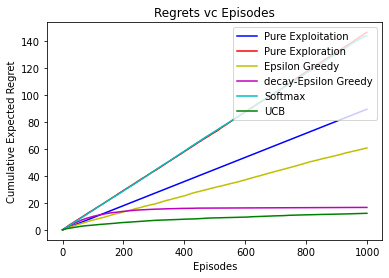

In [64]:
regret_exploit = regret_exploit/50
regret_epsilon = regret_epsilon/50
regret_soft_max = regret_soft_max/50
regret_ucb = regret_ucb/50
regret_depsilon = regret_depsilon/50
regret_explore = regret_explore/50

for j in range(1,1000):
    regret_explore[j] += regret_explore[j-1]
    regret_exploit[j] += regret_exploit[j-1]
    regret_epsilon[j] += regret_epsilon[j-1]
    regret_soft_max[j] += regret_soft_max[j-1]
    regret_ucb[j] += regret_ucb[j-1]
    regret_depsilon[j] += regret_depsilon[j-1]

x = np.arange(1000)
    
# plt.plot(x,regret_exploit)
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("Exploitation vs Average Reward")
# # plt.savefig('exploit.png')
# plt.show()
# plt.close()

# plt.plot(x,regret_explore)
# plt.savefig('explore.png')
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("Exploration vs Average Reward")
# plt.show()
# plt.close()

# plt.plot(x,regret_epsilon)
# plt.savefig('epsilon.png')
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("Epsilon-Greedy vs Average Reward")
# plt.show()
# plt.close()

# plt.plot(x,regret_depsilon)
# plt.savefig('depsilon.png') 
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("decay-Epsilon Greedy vs Average Reward")
# plt.show()
# plt.close()

# plt.plot(x,regret_soft_max)
# plt.savefig('soft_max.png')
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("softmax vs Average Reward")
# plt.show()
# plt.close()
    
# plt.plot(x,regret_ucb)
# plt.savefig('ucb.png')
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("UCB vs Average Reward")
# plt.show()
# plt.close()

plt.plot(x,regret_exploit,'b')
plt.plot(x,regret_explore,'r')
plt.plot(x,regret_epsilon,'y')
plt.plot(x,regret_depsilon,'m')
plt.plot(x,regret_soft_max,'c')
plt.plot(x,regret_ucb,'g')
plt.xlabel("Episodes")
plt.ylabel("Cumulative Expected Regret")
plt.title("Regrets vc Episodes")
plt.legend(["Pure Exploitation","Pure Exploration","Epsilon Greedy","decay-Epsilon Greedy","Softmax","UCB"], loc = "upper right")
plt.show()
plt.close()

# Problem 1, Q8

Plots of % optimal action, for 50 environments and 1000 episodes

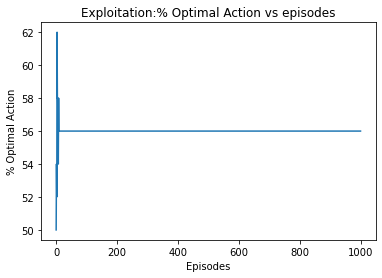

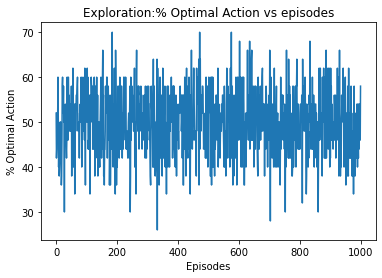

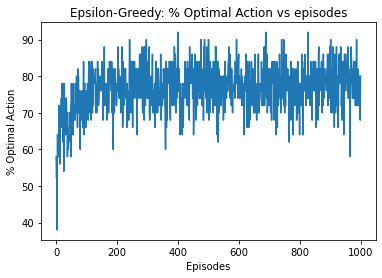

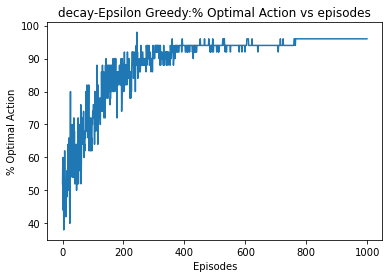

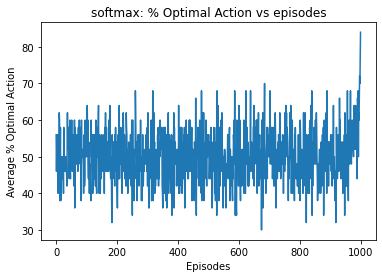

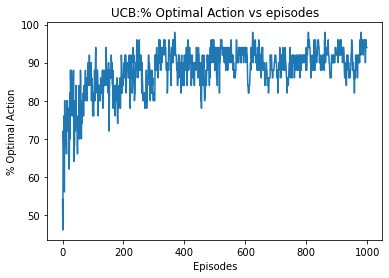

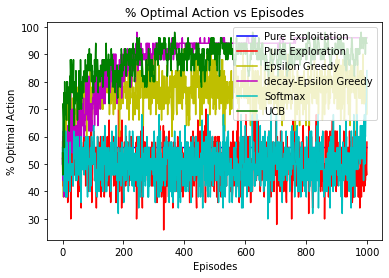

In [65]:
opt_exploit = opt_exploit/50*100
opt_epsilon = opt_epsilon/50*100
opt_soft_max = opt_soft_max/50*100
opt_ucb = opt_ucb/50*100
opt_depsilon = opt_depsilon/50*100
opt_explore = opt_explore/50*100

plt.plot(x,opt_exploit)
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("Exploitation:% Optimal Action vs episodes")
# plt.savefig('exploit.png')
plt.show()
plt.close()

plt.plot(x,opt_explore)
plt.savefig('explore.png')
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("Exploration:% Optimal Action vs episodes")
plt.show()
plt.close()

plt.plot(x,opt_epsilon)
plt.savefig('epsilon.png')
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("Epsilon-Greedy: % Optimal Action vs episodes")
plt.show()
plt.close()

plt.plot(x,opt_depsilon)
plt.savefig('depsilon.png') 
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("decay-Epsilon Greedy:% Optimal Action vs episodes")
plt.show()
plt.close()

plt.plot(x,opt_soft_max)
plt.savefig('soft_max.png')
plt.xlabel("Episodes")
plt.ylabel("Average % Optimal Action")
plt.title("softmax: % Optimal Action vs episodes")
plt.show()
plt.close()
    
plt.plot(x,opt_ucb)
plt.savefig('ucb.png')
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("UCB:% Optimal Action vs episodes")
plt.show()
plt.close()


plt.plot(x,opt_exploit,'b')
plt.plot(x,opt_explore,'r')
plt.plot(x,opt_epsilon,'y')
plt.plot(x,opt_depsilon,'m')
plt.plot(x,opt_soft_max,'c')
plt.plot(x,opt_ucb,'g')
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("% Optimal Action vs Episodes")
plt.legend(["Pure Exploitation","Pure Exploration","Epsilon Greedy","decay-Epsilon Greedy","Softmax","UCB"], loc = "upper right")
plt.show()
plt.close()

Pre-computing values for subsequent questions for 10 arm gaussian bandit environment

In [66]:
# print(prob)
exploit = []
explore = []
epsilon = []
depsilon = []
soft_max = []
ucb = []

regret_exploit = np.zeros(1000)
regret_explore = np.zeros(1000)
regret_epsilon = np.zeros(1000)
regret_depsilon = np.zeros(1000)
regret_soft_max = np.zeros(1000)
regret_ucb = np.zeros(1000)

opt_exploit = np.zeros(1000)
opt_explore = np.zeros(1000)
opt_epsilon = np.zeros(1000)
opt_depsilon = np.zeros(1000)
opt_soft_max = np.zeros(1000)
opt_ucb = np.zeros(1000)

seed = np.arange(50,100)
for i in range(50):
    np.random.seed(seed[i])
    q = random.normal(loc = 0,scale = 1, size = (10))
    bandit10arm = gym.make('TenArmBandit-v0', gauss = q)

    
    vstar = np.amax(q)
    optimal_action = np.argmax(q)
    
    q1,r1,a1 = pureExploitation(bandit10arm,1000)
    q2,r2,a2 = pureExploration(bandit10arm,1000)
    q3,r3,a3 = epsilonGreedy(bandit10arm,1000,0.4)
    q4,r4,a4 = decayEpsilonGreedy(bandit10arm,1000,1,"exponential",0.01)
    q5,r5,a5 = softmax(bandit10arm,1000,100,"linear",0.09999999)
    q6,r6,a6 = UCB(bandit10arm,1000,1)
    
    exploit.append(r1)
    explore.append(r2)
    epsilon.append(r3)
    depsilon.append(r4)
    soft_max.append(r5)
    ucb.append(r6)
    
    for j in range(1000):
        if a1[j]==optimal_action:
            opt_exploit[j]+=1
        if a2[j]==optimal_action:
            opt_explore[j]+=1
        if a3[j]==optimal_action:
            opt_epsilon[j]+=1
        if a4[j]==optimal_action:
            opt_depsilon[j]+=1
        if a5[j]==optimal_action:
            opt_soft_max[j]+=1
        if a6[j]==optimal_action:
            opt_ucb[j]+=1
        
    for j in range(1000):
        regret_exploit[j] += vstar - q[a1[j]]
        regret_explore[j] += vstar - q[a2[j]]
        regret_epsilon[j] += vstar - q[a3[j]]
        regret_depsilon[j] += vstar - q[a4[j]]
        regret_soft_max[j] += vstar - q[a5[j]]
        regret_ucb[j] += vstar - q[a6[j]]


# Problem 1, Q5

Plots of average reward for each agent, for 50 environments and 1000 episodes

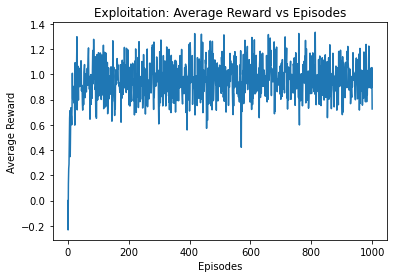

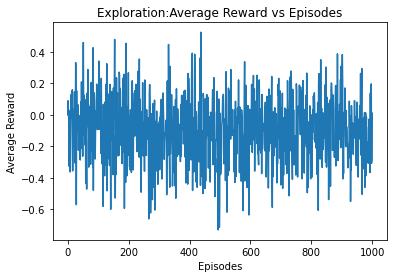

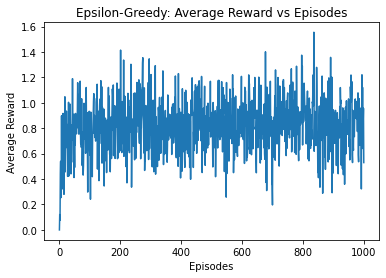

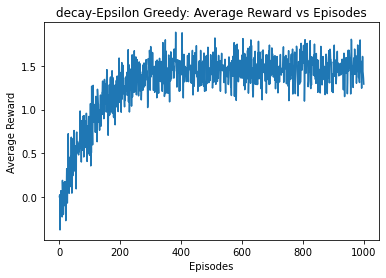

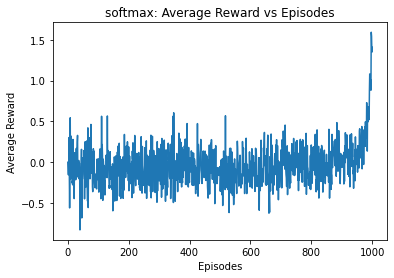

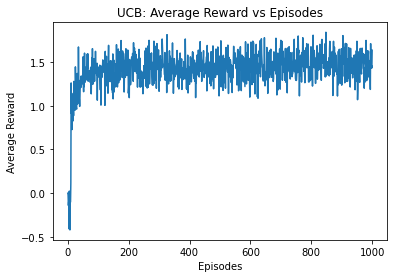

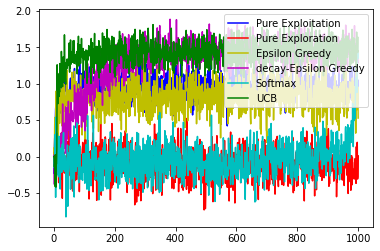

In [67]:
exploit = np.array(exploit)
explore = np.array(explore)
epsilon = np.array(epsilon)
depsilon = np.array(depsilon)
soft_max = np.array(soft_max)
ucb = np.array(ucb)

avg1 = np.average(exploit,axis=0)
avg2 = np.average(explore,axis=0)
avg3 = np.average(epsilon,axis=0)
avg4 = np.average(depsilon,axis=0)
avg5 = np.average(soft_max,axis=0)
avg6 = np.average(ucb,axis=0)
x = np.arange(1001)

# print(np.shape(avg1))

plt.plot(x,avg1)
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Exploitation: Average Reward vs Episodes")
# plt.savefig('exploit.png')
plt.show()
plt.close()

plt.plot(x,avg2)
plt.savefig('explore.png')
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Exploration:Average Reward vs Episodes")
plt.show()
plt.close()

plt.plot(x,avg3)
plt.savefig('epsilon.png')
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy: Average Reward vs Episodes")
plt.show()
plt.close()

plt.plot(x,avg4)
plt.savefig('depsilon.png') 
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("decay-Epsilon Greedy: Average Reward vs Episodes")
plt.show()
plt.close()

plt.plot(x,avg5)
plt.savefig('soft_max.png')
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("softmax: Average Reward vs Episodes")
plt.show()
plt.close()
    
plt.plot(x,avg6)
plt.savefig('ucb.png')
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("UCB: Average Reward vs Episodes")
plt.show()
plt.close()

plt.plot(x,avg1,'b')
plt.plot(x,avg2,'r')
plt.plot(x,avg3,'y')
plt.plot(x,avg4,'m')
plt.plot(x,avg5,'c')
plt.plot(x,avg6,'g')
plt.legend(["Pure Exploitation","Pure Exploration","Epsilon Greedy","decay-Epsilon Greedy","Softmax","UCB"], loc = "upper right")
plt.show()
plt.close()

# Problem 1, Q7

Plots of cumulative expected regret for each agent, for 50 environments and 1000 episodes

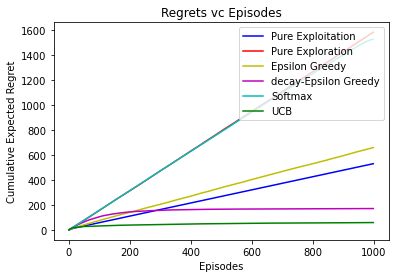

In [18]:
regret_exploit = regret_exploit/50
regret_epsilon = regret_epsilon/50
regret_soft_max = regret_soft_max/50
regret_ucb = regret_ucb/50
regret_depsilon = regret_depsilon/50
regret_explore = regret_explore/50

for j in range(1,1000):
    regret_explore[j] += regret_explore[j-1]
    regret_exploit[j] += regret_exploit[j-1]
    regret_epsilon[j] += regret_epsilon[j-1]
    regret_soft_max[j] += regret_soft_max[j-1]
    regret_ucb[j] += regret_ucb[j-1]
    regret_depsilon[j] += regret_depsilon[j-1]

x = np.arange(1000)
    
# plt.plot(x,regret_exploit)
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("Exploitation vs Average Reward")
# # plt.savefig('exploit.png')
# plt.show()
# plt.close()

# plt.plot(x,regret_explore)
# plt.savefig('explore.png')
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("Exploration vs Average Reward")
# plt.show()
# plt.close()

# plt.plot(x,regret_epsilon)
# plt.savefig('epsilon.png')
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("Epsilon-Greedy vs Average Reward")
# plt.show()
# plt.close()

# plt.plot(x,regret_depsilon)
# plt.savefig('depsilon.png') 
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("decay-Epsilon Greedy vs Average Reward")
# plt.show()
# plt.close()

# plt.plot(x,regret_soft_max)
# plt.savefig('soft_max.png')
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("softmax vs Average Reward")
# plt.show()
# plt.close()
    
# plt.plot(x,regret_ucb)
# plt.savefig('ucb.png')
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.title("UCB vs Average Reward")
# plt.show()
# plt.close()

plt.plot(x,regret_exploit,'b')
plt.plot(x,regret_explore,'r')
plt.plot(x,regret_epsilon,'y')
plt.plot(x,regret_depsilon,'m')
plt.plot(x,regret_soft_max,'c')
plt.plot(x,regret_ucb,'g')
plt.xlabel("Episodes")
plt.ylabel("Cumulative Expected Regret")
plt.title("Regrets vc Episodes")
plt.legend(["Pure Exploitation","Pure Exploration","Epsilon Greedy","decay-Epsilon Greedy","Softmax","UCB"], loc = "upper right")
plt.show()
plt.close()

# Problem 1, Q9

Plots of % optimal actions for each agent, for 50 environments and 1000 episodes

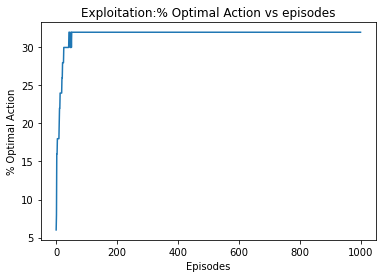

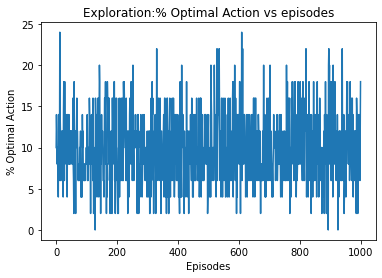

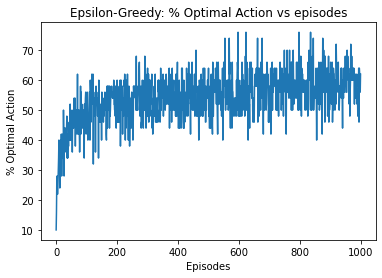

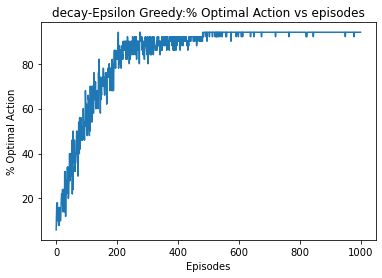

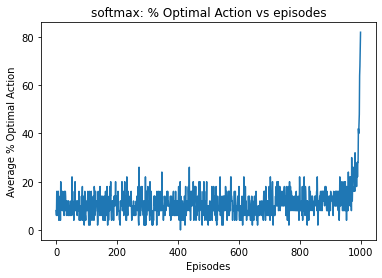

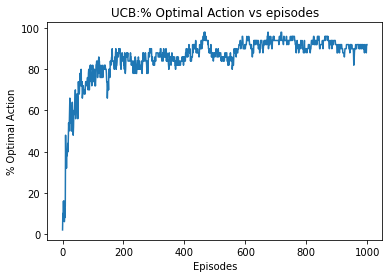

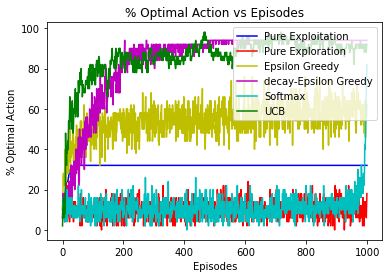

In [19]:
opt_exploit = opt_exploit/50*100
opt_epsilon = opt_epsilon/50*100
opt_soft_max = opt_soft_max/50*100
opt_ucb = opt_ucb/50*100
opt_depsilon = opt_depsilon/50*100
opt_explore = opt_explore/50*100

plt.plot(x,opt_exploit)
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("Exploitation:% Optimal Action vs episodes")
# plt.savefig('exploit.png')
plt.show()
plt.close()

plt.plot(x,opt_explore)
plt.savefig('explore.png')
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("Exploration:% Optimal Action vs episodes")
plt.show()
plt.close()

plt.plot(x,opt_epsilon)
plt.savefig('epsilon.png')
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("Epsilon-Greedy: % Optimal Action vs episodes")
plt.show()
plt.close()

plt.plot(x,opt_depsilon)
plt.savefig('depsilon.png') 
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("decay-Epsilon Greedy:% Optimal Action vs episodes")
plt.show()
plt.close()

plt.plot(x,opt_soft_max)
plt.savefig('soft_max.png')
plt.xlabel("Episodes")
plt.ylabel("Average % Optimal Action")
plt.title("softmax: % Optimal Action vs episodes")
plt.show()
plt.close()
    
plt.plot(x,opt_ucb)
plt.savefig('ucb.png')
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("UCB:% Optimal Action vs episodes")
plt.show()
plt.close()


plt.plot(x,opt_exploit,'b')
plt.plot(x,opt_explore,'r')
plt.plot(x,opt_epsilon,'y')
plt.plot(x,opt_depsilon,'m')
plt.plot(x,opt_soft_max,'c')
plt.plot(x,opt_ucb,'g')
plt.xlabel("Episodes")
plt.ylabel("% Optimal Action")
plt.title("% Optimal Action vs Episodes")
plt.legend(["Pure Exploitation","Pure Exploration","Epsilon Greedy","decay-Epsilon Greedy","Softmax","UCB"], loc = "upper right")
plt.show()
plt.close()

# Problem 2, Q1.

Defines a function that returns a list of tuples containing information like current state, result of the action taken by the agent, the reward of taking an action, and the next state

The reason for returning the result of the action was to verify whether the environment is consistent or not, something which would not be possible if we take into account the action taken by the agent as the ennvironment is stochastic

In [20]:
def generateTrajectory(env,pi,maxSteps):
    
    timesteps = 0
    ep = []
    state = 3
    # seed = 50
    while state!=6 and state!=0:
        # random.seed(seed)
        action = random.binomial(1,0.5)
        next_state, action, reward = env.step(action,state)
        ep.append((state,action,reward,next_state))
        timesteps += 1
        state = next_state
        # seed += 10
        if timesteps==maxSteps:
            if state!=6 and state!=0:
                ep.clear()  
            break
    # print("Start state: 3 | Terminal State:",next_state,"| Reward:", reward,"| Timesteps:", timesteps )
    # exp.append(ep)
    env.reset()
    return ep

In [71]:
print("Testing the generateTrajectory function:")
np.random.seed(3)
rwe = gym.make('RandomWalk-v0')
for j in range(10):
    ep = generateTrajectory(rwe,0,10)
    if (len(ep)):
        print("The state terminates only for",j)
    for i in range(len(ep)):
        print("Starting State:",ep[i][0],"Resulting Action:",ep[i][1],"Reward:",ep[i][2],"Next State:",ep[i][3])

Testing the generateTrajectory function:
The state terminates only for 0
Starting State: 3 Resulting Action: 0.7081478226181048 Reward: 0 Next State: 4
Starting State: 4 Resulting Action: 0.510827605197663 Reward: 0 Next State: 5
Starting State: 5 Resulting Action: 0.8962930889334381 Reward: 1 Next State: 6
The state terminates only for 1
Starting State: 3 Resulting Action: 0.20724287813818676 Reward: 0 Next State: 2
Starting State: 2 Resulting Action: 0.44080984365063647 Reward: 0 Next State: 1
Starting State: 1 Resulting Action: 0.4568332243947111 Reward: 0 Next State: 0
The state terminates only for 3
Starting State: 3 Resulting Action: 0.8457508712931793 Reward: 0 Next State: 4
Starting State: 4 Resulting Action: 0.09221700887172424 Reward: 0 Next State: 3
Starting State: 3 Resulting Action: 0.5578407623884509 Reward: 0 Next State: 4
Starting State: 4 Resulting Action: 0.22505450483983191 Reward: 0 Next State: 3
Starting State: 3 Resulting Action: 0.46894024869916906 Reward: 0 Next

# Problem 2, Q.2

Defines a function that decays the value of alpha and returns a list containing the saud values


In [79]:
def decayAlpha(initialValue, finalValue, maxSteps, decayTypes):
    e = 0
    x = []
    k = log(initialValue/finalValue)/(maxSteps-1)
    while e<maxSteps:
        if decayTypes=="linear":
            x.append(initialValue-(e)*(initialValue-finalValue)/(maxSteps-1))
        else:
            x.append(initialValue*exp(-(e)*k))
        e+=1
    return x

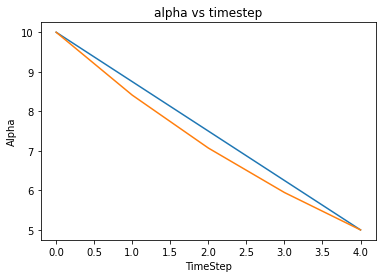

In [82]:
a = decayAlpha(10,5,5,"linear")
a2 = decayAlpha(10,5,5,"exp")
x = np.arange(5)
plt.plot(x,a)
plt.plot(x,a2)
plt.xlabel("TimeStep")
plt.ylabel("Alpha")
plt.title("alpha vs timestep")
plt.show()
plt.close()

# Problem 2, Q.3

The algorithm for Monte Carlo Estimates

In [75]:
def monteCarlo(env,pi,gamma,alpha,maxSteps,noEpisodes,firstVisit):
    v = np.zeros(env.observation_space.n)
    v_r = np.zeros((noEpisodes,env.observation_space.n))
    Gt = np.zeros(noEpisodes)
    for e in range(noEpisodes):
        t = generateTrajectory(env,pi,maxSteps)
        visited = np.zeros(env.observation_space.n)
        
        for i in range(len(t)):
            s = t[i][0]
            # print(s)
            r = t[i][2]
            if visited[s] and firstVisit:
                continue
            G = 0
            for j in range(i,len(t)):
                G += gamma*t[j][2]
            Gt[e] = G
            v[s] = v[s] + alpha[e]*(G-v[s])
            visited[s] = 1
        
        v_r[e] = v
        
    return v,v_r,Gt

# Problem 2, Q.4

The algorithm for Temporal Difference

In [76]:
import numpy as np
from decayalpha import decayAlpha
def temporaldifference(env,pi,gamma,alpha,noEpisodes):
    v = np.zeros(env.observation_space.n)
    v_r = np.zeros((noEpisodes,env.observation_space.n))
    Gt = np.zeros(noEpisodes)
    for e in range(noEpisodes):
        s = env.reset()
        done = False
        
        while not done:
            next,action,reward = env.step(0,s)
            td_target = reward
            if next==6 or next==0:
                done = True
            if not done:
                td_target = td_target + gamma*v[next]
                if s==3:
                    Gt[e] = td_target
            td_error = td_target-v[s]
            v[s] = v[s] + alpha[e]*td_error
            s = next
        v_r[e] = v
    return v,v_r,Gt            

The alpha function is same for subsequent plots hence defining it seperately for all the steps

In [40]:
rwe = gym.make('RandomWalk-v0')
alpha = decayAlpha(0.5,0.01,250,"e")
for i in range(250):
    alpha = np.append(alpha,0.01)

# Problem 2, Q.5
The plot of MC-FVMC estimate for all non-terminal state over 500 episodes to see how closely they converge to their true values.

## Legend
V(5) - Blue<br>
V(4) - Green<br>
V(3) - Yellow<br>
V(2) - Red<br>
V(1) - Orange<br>

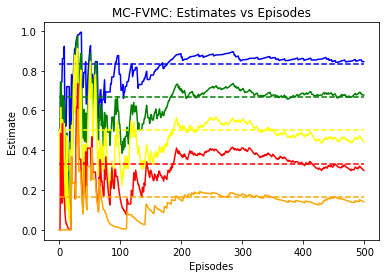

In [41]:
np.random.seed(3)
v,v_r2,Gt1 = monteCarlo(rwe,0,1,alpha,200,500,1)
x = np.arange(0,500)
plt.plot(x,v_r2[:,5],color = 'blue')
plt.plot(x,5/6*np.ones(500),color = 'blue',linestyle = "--")
plt.plot(x,v_r2[:,4],color = 'green')
plt.plot(x,4/6*np.ones(500),color = 'green',linestyle = "--")
plt.plot(x,v_r2[:,3],color = 'yellow')
plt.plot(x,3/6*np.ones(500),color = 'yellow',linestyle = "--")
plt.plot(x,v_r2[:,2],color = 'red')
plt.plot(x,2/6*np.ones(500),color = 'red',linestyle = "--")
plt.plot(x,v_r2[:,1],color = 'orange')
plt.plot(x,1/6*np.ones(500),color = 'orange',linestyle = "--")
# plt.legend(["v(5)","v(4)","v(3)","v(2)","v(1)"])
plt.xlabel("Episodes")
plt.ylabel("Estimate")
plt.title("MC-FVMC: Estimates vs Episodes")
plt.savefig("new3.pdf")
plt.show()
plt.close()

# Problem 2, Q.6
The plot of MC-EVMC estimate for all non-terminal state over 500 episodes to see how closely they converge to their true values.

## Legend
V(5) - Blue<br>
V(4) - Green<br>
V(3) - Yellow<br>
V(2) - Red<br>
V(1) - Orange<br>

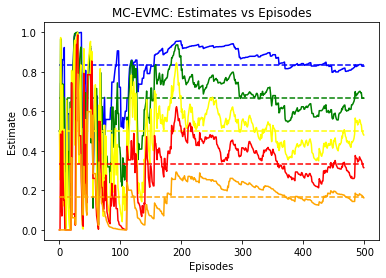

In [42]:
np.random.seed(3)
v,v_r1,Gt2 = monteCarlo(rwe,0,1,alpha,200,500,0)
x = np.arange(0,500)
plt.plot(x,v_r1[:,5],color = 'blue')
plt.plot(x,5/6*np.ones(500),color = 'blue',linestyle = "--")
plt.plot(x,v_r1[:,4],color = 'green')
plt.plot(x,4/6*np.ones(500),color = 'green',linestyle = "--")
plt.plot(x,v_r1[:,3],color = 'yellow')
plt.plot(x,3/6*np.ones(500),color = 'yellow',linestyle = "--")
plt.plot(x,v_r1[:,2],color = 'red')
plt.plot(x,2/6*np.ones(500),color = 'red',linestyle = "--")
plt.plot(x,v_r1[:,1],color = 'orange')
plt.plot(x,1/6*np.ones(500),color = 'orange',linestyle = "--")
plt.savefig("new2.pdf")
plt.xlabel("Episodes")
plt.ylabel("Estimate")
plt.title("MC-EVMC: Estimates vs Episodes")
plt.show()
plt.close()

# Problem 2, Q.7
The plot of Td estimate for all non-terminal state over 500 episodes to see how closely they converge to their true values.

## Legend
V(5) - Blue<br>
V(4) - Green<br>
V(3) - Yellow<br>
V(2) - Red<br>
V(1) - Orange<br>

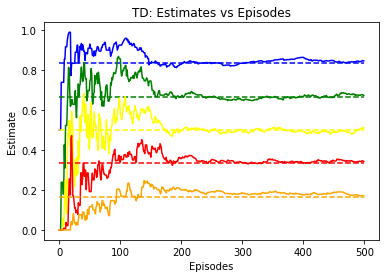

In [43]:
np.random.seed(3)
v,v_r,Gt3 = temporaldifference(rwe,0,1,alpha,500)
x = np.arange(0,500)
plt.plot(x,v_r[:,5],color = 'blue')
plt.plot(x,5/6*np.ones(500),color = 'blue',linestyle = "--")
plt.plot(x,v_r[:,4],color = 'green')
plt.plot(x,4/6*np.ones(500),color = 'green',linestyle = "--")
plt.plot(x,v_r[:,3],color = 'yellow')
plt.plot(x,3/6*np.ones(500),color = 'yellow',linestyle = "--")
plt.plot(x,v_r[:,2],color = 'red')
plt.plot(x,2/6*np.ones(500),color = 'red',linestyle = "--")
plt.plot(x,v_r[:,1],color = 'orange')
plt.plot(x,1/6*np.ones(500),color = 'orange',linestyle = "--")
plt.savefig("new.pdf")
plt.xlabel("Episodes")
plt.ylabel("Estimate")
plt.title("TD: Estimates vs Episodes")
plt.show()
plt.close()

# Problem 2, Q.8
The plot of MC-FVMC estimate for all non-terminal state in log-scale, to see how the plots are actually converging to their optimal values/true values.

## Legend
V(5) - Blue<br>
V(4) - Green<br>
V(3) - Yellow<br>
V(2) - Red<br>
V(1) - Orange<br>

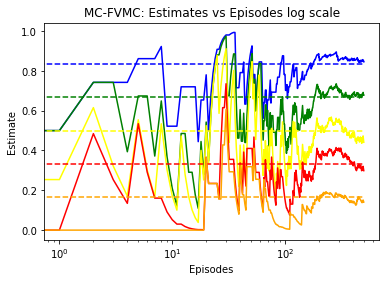

In [44]:
plt.plot(x,v_r2[:,5],color = 'blue')
plt.plot(x,5/6*np.ones(500),color = 'blue',linestyle = "--")
plt.plot(x,v_r2[:,4],color = 'green')
plt.plot(x,4/6*np.ones(500),color = 'green',linestyle = "--")
plt.plot(x,v_r2[:,3],color = 'yellow')
plt.plot(x,3/6*np.ones(500),color = 'yellow',linestyle = "--")
plt.plot(x,v_r2[:,2],color = 'red')
plt.plot(x,2/6*np.ones(500),color = 'red',linestyle = "--")
plt.plot(x,v_r2[:,1],color = 'orange')
plt.plot(x,1/6*np.ones(500),color = 'orange',linestyle = "--")
plt.xscale("log")
plt.savefig("new4.pdf")
plt.xlabel("Episodes")
plt.ylabel("Estimate")
plt.title("MC-FVMC: Estimates vs Episodes log scale")
plt.show()
plt.close()

# Problem 2, Q.9
The plot of MC-EVMC estimate for all non-terminal state in log-scale, to see how the plots are actually converging to their optimal values/true values.

## Legend
V(5) - Blue<br>
V(4) - Green<br>
V(3) - Yellow<br>
V(2) - Red<br>
V(1) - Orange<br>

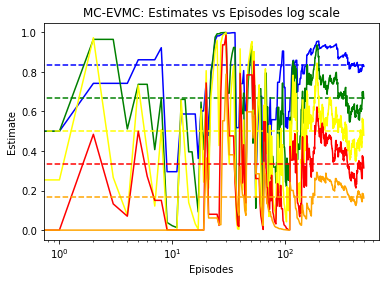

In [45]:
plt.plot(x,v_r1[:,5],color = 'blue')
plt.plot(x,5/6*np.ones(500),color = 'blue',linestyle = "--")
plt.plot(x,v_r1[:,4],color = 'green')
plt.plot(x,4/6*np.ones(500),color = 'green',linestyle = "--")
plt.plot(x,v_r1[:,3],color = 'yellow')
plt.plot(x,3/6*np.ones(500),color = 'yellow',linestyle = "--")
plt.plot(x,v_r1[:,2],color = 'red')
plt.plot(x,2/6*np.ones(500),color = 'red',linestyle = "--")
plt.plot(x,v_r1[:,1],color = 'orange')
plt.plot(x,1/6*np.ones(500),color = 'orange',linestyle = "--")
plt.xscale("log")
plt.savefig("new5.pdf")
plt.xlabel("Episodes")
plt.ylabel("Estimate")
plt.title("MC-EVMC: Estimates vs Episodes log scale")
plt.show()
plt.close()

# Problem 2, Q.10
The plot of Td estimate for all non-terminal state in log-scale, to see how the plots are actually converging to their optimal values/true values.

## Legend
V(5) - Blue<br>
V(4) - Green<br>
V(3) - Yellow<br>
V(2) - Red<br>
V(1) - Orange<br>

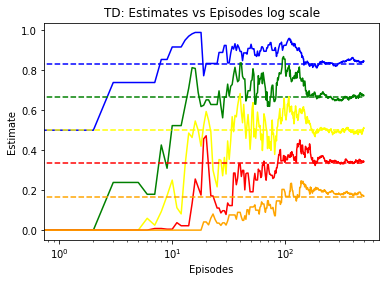

In [46]:
plt.plot(x,v_r[:,5],color = 'blue')
plt.plot(x,5/6*np.ones(500),color = 'blue',linestyle = "--")
plt.plot(x,v_r[:,4],color = 'green')
plt.plot(x,4/6*np.ones(500),color = 'green',linestyle = "--")
plt.plot(x,v_r[:,3],color = 'yellow')
plt.plot(x,3/6*np.ones(500),color = 'yellow',linestyle = "--")
plt.plot(x,v_r[:,2],color = 'red')
plt.plot(x,2/6*np.ones(500),color = 'red',linestyle = "--")
plt.plot(x,v_r[:,1],color = 'orange')
plt.plot(x,1/6*np.ones(500),color = 'orange',linestyle = "--")
plt.xscale("log")
plt.savefig("new6.pdf")
plt.xlabel("Episodes")
plt.ylabel("Estimate")
plt.title("TD: Estimates vs Episodes log scale")
plt.show()
plt.close()

#  Problem 2, Q.12
The plot of MC-FVMC target value for non-terminal state=3. The actual value is 3/6.

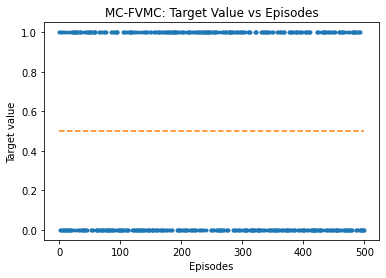

In [47]:
plt.plot(x,Gt1,'.')
plt.plot(x,3/6*np.ones(500),'--')
plt.savefig("new7.pdf")
plt.xlabel("Episodes")
plt.ylabel("Target value")
plt.title("MC-FVMC: Target Value vs Episodes")
plt.show()
plt.close()

# Problem 2, Q.13
The plot of MC-EVMC target value for non-terminal state=3. The actual value is 3/6.

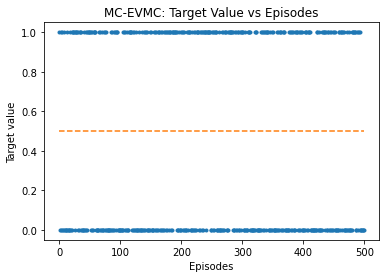

In [48]:
plt.plot(x,Gt2,'.')
plt.plot(x,3/6*np.ones(500),'--')
plt.savefig("new8.pdf")
plt.xlabel("Episodes")
plt.ylabel("Target value")
plt.title("MC-EVMC: Target Value vs Episodes")
plt.show()
plt.close()

# Problem 2, Q.14

The plot of Td target value for non-terminal state=3. The actual value is 3/6.

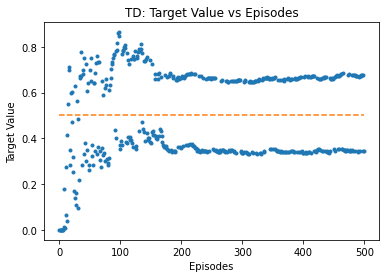

In [49]:
plt.plot(x,Gt3,'.')
plt.plot(x,3/6*np.ones(500),'--')
plt.savefig("new9.pdf")
plt.xlabel("Episodes")
plt.ylabel("Target Value")
plt.title("TD: Target Value vs Episodes")
plt.show()
plt.close()